# Géolocalisation et Python

- [I. Format d'angle](#formats)
- [II. Carte WMTS](#tiles)
- [III. Géolocalisation d'une image](#exif)

<img src="https://snlpdo.fr/SNT/img/Rendu-Terre3D.png" alt="Terre 3D" width="800">

## I. Format d'angle<a name="formats">

Pour obtenir la valeur en *degrés décimaux (dd)* d'une lattitude (ou d'une longitude) exprimée en *degrés/minutes/secondes* (d/m/s), on utilise la formule de conversion suivante:
$$ dd = d + \frac{m}{60} + \frac{s}{3600}$$

- Compléter la ligne du code Python ci-après pour calculer *dd* à partir des variables *d*, *s* et *m*:

In [ ]:
d = 3
m = 52
s = 55.39

dd = 


- Ajouter la commande *print(dd)* à la dernière ligne de la cellulle ci-dessus et (ré-)exécuter pour afficher le résultat de la conversion.

- Utiliser ce code pour calculer et compléter les valeurs décimales (dd) des géolocalisations ci-après:

| Lieu | Latitude (d m s) | Longitude (d m s) | Latitude (dd) | Longitude (dd) | Ville | Vue aérienne |
|------|------------------|-------------------|---------------|----------------|-------|--------------|
| 1    | 43 36 39.22      | 3 52 55.39        |               |                |       |              |
| 2    | 11 54 18.72      | 79 49 22.08       |               |                |       |              |
| 3    | -33 27 46.93     | -70 39 36.44      |               |                |       |              |
| 4    | 45 29 55.54      | -73 35 42.14      |               |                |       |              |

Utiliser une application de cartographie (Google Maps...) pour identifier chaque ville correspondant à ces coordonnées (récupérer une vue aérienne du lieu). 

**Attention: la formule de conversion ci-dessus n'est valable qu'avec des angles positifs.**

Pour une conversion correcte, il faut utiliser le code suivant:

In [ ]:
import math 

d = -127
m = 47
s = 1.71

dd = math.copysign(abs(d) + m/60 + s/3600, d)
print(dd)

On peut utiliser cet *algorithme* pour convertir un angle du format degré décimal vers degré/minutes/secondes:

```
d = partie_entiere(dd)

md = partie_fractionnaire(dd)*60
m = partie_entiere(md)

s = 60*partie_fractionnaire(md)
```

<small>Aides: 
- la partie entière d'un nombre s'obtient avec la fonction int(). Par exemple int(34.22) donne 34.
- la partie fractionnaire d'un nombre s'obtient en lui retranchant sa partie entière.
</small>

Compléter les lignes du code Python ci-après pour calculer les degrés/minutes/secondes (d/m/s) d'un angle *dd* donné en degré décimal

In [ ]:
dd = 45.068831

d = 

md = 
m = 

s = 

print(d, m, s)

## II. Carte WMTS<a name="tiles">
    
WMTS (*Web Map Tile Service*) est un protocole qui permet d'échanger tout ou partie de cartes de la surface terrestre. Il est utilisé par OpenStreetMap (cartes *libres*), Geoportail (cartes IGN), Google Map...
    
Ces cartes de la Terre sont classées par niveaux de résolution (ou de détails) et décomposées en *tuiles* (=images de 256 x 256 pixels):
- niveau 0: 1 seule tuile, très peu de détails.
- niveau 1: 4 tuiles (2 lignes, 2 colonnes), un peu plus de détails.
- niveau 2: 16 tuiles (4 lignes, 4 colonnes)
- ...
    
<img width="820" src="https://snlpdo.fr/SNT/img/Rendu-niveaux_carte.png" alt="3 premiers niveaux de résolution">

In [1]:
from ressources import *

### Carte OpenStreetMap de niveau 0:

In [2]:
# Télécharger la tuile ligne 0, colonne 0, niveau 0
t00 = tuile(0,0,niveau=0)

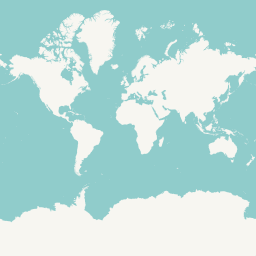

In [3]:
# Afficher cette tuile
display(t00) 

### Carte OpenStreetMap de niveau 1:

- On télécharge successivement les 4 tuiles (de 256 x 256 pixels) du niveau 1.

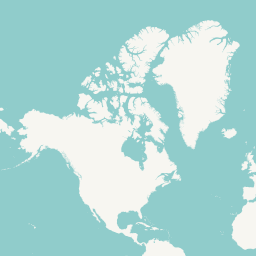

In [4]:
t00 = tuile(0,0,niveau=1) # ligne 0, colonne 0
display(t00)

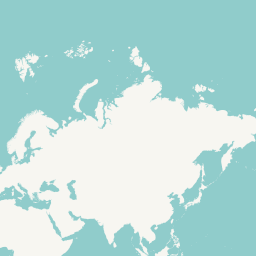

In [5]:
t01 = tuile(0,1,niveau=1) # ligne 0, colonne 1
display(t01)

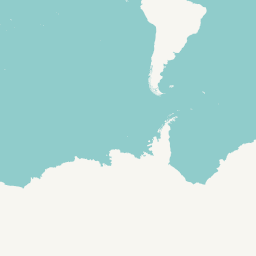

In [6]:
t10 = tuile(1,0,niveau=1) # ligne 1, colonne 0
display(t10)

In [ ]:
t11 = tuile(1,1,niveau=1) # ligne 1, colonne 1
display(t11)

- Pour reconstituer la carte de niveau 1, il faut créer une image de 512 x 512 pixels et recopier (avec la fonction *paste*) les 4 tuiles précédentes au bon endroit:

In [ ]:
carte_n1 = Image.new('RGB', (512, 512))

carte_n1.paste(t10, (0,256) )
display(carte_n1)

Compléter le code Python ci-dessus pour reconstituer entièrement la carte de niveau 1 à partir des tuiles t00, t01, t10 et t11 (rendre une capture d'écran du résultat).

<small>Aide:
- carte_n1 est une image de 512 x 512 pixels, alors que les tuiles sont des images 256 x 256 pixels.
- la fonction carte_n1.paste() permet de coller une tuile à une position spécifique dans carte_n1:
    - les coordonnées (x,y) sont celles du coin supérieur gauche de la tuile dans carte_n1.
    - l'axe des abscisses (x) est orienté vers la droite. Celui des ordonnées (y) vers le bas. Le point (0,0) se trouve en haut à gauche de carte_n1.
</small>

**(Question bonus)** Compléter, ci-après, le code Python pour récupérer les 16 tuiles et reconstituer la carte de niveau 2

In [ ]:
carte_n2 = Image.new('RGB', (1024, 1024))


## III. Géolocalisation d'une image<a name="exif">

Les images JPEG (.jpeg ou .jpg) peuvent contenir un certain nombre de métadonnées (format EXIF):
- Modèle de l'appareil photo
- Réglages
- Date
- Géolocalisation
...

La géolocalisation d'une image s'effectue en 4 étapes:

1. Charger (et afficher) l'image

In [ ]:
url = 'https://snlpdo.fr/SNT/img/mer.jpg'
image = Image.open(requests.get(url, stream=True).raw)
display(image)

2. Extraire (et afficher) toutes les données EXIF

In [ ]:
exif = image.getexif()
print_exif(exif)

3. Ne conserver que les informations de latitude et longitude:

In [ ]:
latitude, longitude = extract_geoloc(exif)
print(latitude, longitude)

4. Positionner cette géolocalisation sur la tuile correspondante:

In [ ]:
t = geotuile(latitude, longitude, niveau=15, dispLoc=True, dispInfo=True)
display(t)

Répéter ces 4 étapes sur une photo jpg de votre choix (**Attention: cette image doit incorporer des données EXIF avec des informations de géolocalisation**) et rendre une capture d'écran du résultat (changer le niveau de résolution si nécessaire).